In [2]:
# librerías
from sklearn.ensemble import RandomForestRegressor
# The error metric, In this cas, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score
# an efficient data structure
import pandas as pd
# 
import matplotlib.pyplot as plt

import seaborn as sns

# graphs
%matplotlib inline

# style
plt.style.use('seaborn')

#import the data
df = pd.read_csv("data/muestreo_con_indices.csv")
df.head()

,FECHA,x,y,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,CCCI_simpl,GNDVI,CCCI,N_TOTAL,RVI,CIred_edge,TCARI_OSAVI_RE
0,09/11/2017,672991,2834763,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,0.155488,0.336669,0.362977,3.26,1.520898,0.161725,2.154459
1,09/11/2017,673009,2834792,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,0.175170,0.329649,0.382892,3.31,1.511626,0.167301,2.188258
2,09/11/2017,673016,2834822,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,0.192850,0.353286,0.348945,3.78,1.592500,0.172282,2.167296
3,09/11/2017,673030,2834850,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,0.317840,0.372851,0.355268,3.48,1.736582,0.208449,2.237800
4,09/11/2017,673053,2834876,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,0.362056,0.344411,0.435488,3.49,1.600575,0.221476,2.164132


In [3]:
df.columns

Index(['FECHA', 'x', 'y', 'MCARI_OSAVI', 'CI_green', 'NDRE', 'NDVI',
       'MCARI_OSAVI_RE', 'MTCI', 'TCARI_OSAVI', 'CCCI_simpl', 'GNDVI', 'CCCI',
       'N_TOTAL', 'RVI', 'CIred_edge', 'TCARI_OSAVI_RE'],
      dtype='object')

In [4]:
cols = ['FECHA', 'x', 'y', 'MCARI_OSAVI', 'CI_green', 'NDRE', 'NDVI',
       'MCARI_OSAVI_RE', 'MTCI', 'TCARI_OSAVI', 'CCCI_simpl', 'GNDVI', 'CCCI',
       'RVI', 'CIred_edge', 'TCARI_OSAVI_RE','N_TOTAL']


In [5]:
df = df[cols]
df.head()

,FECHA,x,y,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,CCCI_simpl,GNDVI,CCCI,RVI,CIred_edge,TCARI_OSAVI_RE,N_TOTAL
0,09/11/2017,672991,2834763,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,0.155488,0.336669,0.362977,1.520898,0.161725,2.154459,3.26
1,09/11/2017,673009,2834792,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,0.175170,0.329649,0.382892,1.511626,0.167301,2.188258,3.31
2,09/11/2017,673016,2834822,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,0.192850,0.353286,0.348945,1.592500,0.172282,2.167296,3.78
3,09/11/2017,673030,2834850,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,0.317840,0.372851,0.355268,1.736582,0.208449,2.237800,3.48
4,09/11/2017,673053,2834876,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,0.362056,0.344411,0.435488,1.600575,0.221476,2.164132,3.49


In [6]:
X = df
y = X.pop("N_TOTAL")

In [6]:
# eliminar columnas
X.drop("P2O5 mg/kg", axis=1, inplace=True)
X.drop("P2O5 kg/ha", axis=1, inplace=True)
X.drop("Altura_PTA", axis=1, inplace=True)
X.drop("x", axis=1, inplace=True)
X.drop("y", axis=1, inplace=True)


In [7]:
X.count()

FECHA             162
x                 162
y                 162
MCARI_OSAVI       162
CI_green          162
NDRE              162
NDVI              162
MCARI_OSAVI_RE    162
MTCI              162
TCARI_OSAVI       162
CCCI_simpl        162
GNDVI             162
CCCI              162
RVI               162
CIred_edge        162
TCARI_OSAVI_RE    162
dtype: int64

In [8]:
X["NO3-NH4"].fillna(X["NO3-NH4"].mean(), inplace=True)
X["M.O."].fillna(X["M.O."].mean(), inplace=True)
#X["P2O5 mg/kg"].fillna(X["P2O5 mg/kg"].mean(), inplace=True)
#X["P2O5 kg/ha"].fillna(X["P2O5 kg/ha"].mean(), inplace=True)
X["%Humedad"].fillna(X["%Humedad"].mean(), inplace=True)

X.count()


FECHA             103
MCARI_OSAVI       103
CI_green          103
NDRE              103
NDVI              103
MCARI_OSAVI_RE    103
MTCI              103
TCARI_OSAVI       103
CCCI_simpl        103
GNDVI             103
CCCI              103
RVI               103
CIred_edge        103
TCARI_OSAVI_RE    103
SPAD              103
NO3-NH4           103
M.O.              103
%Humedad          103
% ARENA           103
% ARCILLA         103
% LIMO            103
CLASE TEXTURAL    103
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 16 columns):
FECHA             162 non-null object
x                 162 non-null int64
y                 162 non-null int64
MCARI_OSAVI       162 non-null float64
CI_green          162 non-null float64
NDRE              162 non-null float64
NDVI              162 non-null float64
MCARI_OSAVI_RE    162 non-null float64
MTCI              162 non-null float64
TCARI_OSAVI       162 non-null float64
CCCI_simpl        162 non-null float64
GNDVI             162 non-null float64
CCCI              162 non-null float64
RVI               162 non-null float64
CIred_edge        162 non-null float64
TCARI_OSAVI_RE    162 non-null float64
dtypes: float64(13), int64(2), object(1)
memory usage: 20.3+ KB


In [9]:
print(X["NO3-NH4"].max())
print(X["M.O."].max())
#print(X["P2O5 mg/kg"].mean())
#print(X["P2O5 kg/ha"].mean())
print(X["%Humedad"].mean())

66.23560125
3.6300179960000003
20.004128494341185


In [9]:
# get just the numeric variables by selecting only the variables that are not "object" datatypes
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head(10)

,x,y,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,CCCI_simpl,GNDVI,CCCI,RVI,CIred_edge,TCARI_OSAVI_RE
0,672991,2834763,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,0.155488,0.336669,0.362977,1.520898,0.161725,2.154459
1,673009,2834792,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,0.175170,0.329649,0.382892,1.511626,0.167301,2.188258
2,673016,2834822,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,0.192850,0.353286,0.348945,1.592500,0.172282,2.167296
3,673030,2834850,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,0.317840,0.372851,0.355268,1.736582,0.208449,2.237800
4,673053,2834876,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,0.362056,0.344411,0.435488,1.600575,0.221476,2.164132
5,673055,2834900,0.244962,0.979648,0.087967,0.206629,0.258192,0.903606,1.172938,0.264985,0.328648,0.426990,1.521703,0.192978,2.182215
6,673174,2834640,0.266601,0.946594,0.072872,0.190868,0.164325,0.741186,1.300863,0.139618,0.321137,0.382338,1.472472,0.157310,2.128348
7,673177,2834950,0.305626,1.257123,0.090900,0.270798,0.197606,0.644648,1.391197,0.289347,0.385795,0.335682,1.743250,0.200117,2.227669
8,673184,2834661,0.308447,1.207189,0.086401,0.273490,0.173436,0.591143,1.378921,0.251979,0.375673,0.316236,1.756289,0.189377,2.118948
9,673198,2834685,0.289723,1.100163,0.074131,0.226684,0.114325,0.598586,1.355004,0.150069,0.354695,0.327098,1.586881,0.160238,2.011704


In [11]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
X["C_TEXTURAL"] = lb_make.fit_transform(X["CLASE TEXTURAL"])
X.head(10)

,FECHA,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,CCCI_simpl,GNDVI,...,TCARI_OSAVI_RE,SPAD,NO3-NH4,M.O.,%Humedad,% ARENA,% ARCILLA,% LIMO,CLASE TEXTURAL,C_TEXTURAL
0,09/11/2017,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,0.155488,0.336669,...,2.154459,37.1,39.062021,1.544575,12.401674,61.32,23.04,15.64,FRANCO ARCILLOSO ARENOSO,0
1,09/11/2017,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,0.175170,0.329649,...,2.188258,33.1,39.062021,2.214359,11.348964,63.32,23.04,13.64,FRANCO ARCILLOSO ARENOSO,0
2,09/11/2017,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,0.192850,0.353286,...,2.167296,38.6,13.586790,1.545501,13.609898,65.32,19.04,15.64,FRANCO ARENOSO,1
3,09/11/2017,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,0.317840,0.372851,...,2.237800,37.6,22.078534,1.879976,13.875823,65.32,20.68,14.00,FRANCO ARCILLOSO ARENOSO,0
4,09/11/2017,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,0.362056,0.344411,...,2.164132,37.1,20.380185,3.422192,12.392777,67.32,18.68,14.00,FRANCO ARENOSO,1
5,09/11/2017,0.244962,0.979648,0.087967,0.206629,0.258192,0.903606,1.172938,0.264985,0.328648,...,2.182215,37.1,22.078534,2.684608,12.908497,67.32,20.68,12.00,FRANCO ARCILLOSO ARENOSO,0
6,09/11/2017,0.266601,0.946594,0.072872,0.190868,0.164325,0.741186,1.300863,0.139618,0.321137,...,2.128348,35.6,20.380185,1.143012,13.653773,60.04,23.24,16.72,FRANCO ARCILLOSO ARENOSO,0
7,09/11/2017,0.305626,1.257123,0.090900,0.270798,0.197606,0.644648,1.391197,0.289347,0.385795,...,2.227669,36.7,27.173580,1.074272,15.018094,62.04,21.24,16.72,FRANCO ARCILLOSO ARENOSO,0
8,09/11/2017,0.308447,1.207189,0.086401,0.273490,0.173436,0.591143,1.378921,0.251979,0.375673,...,2.118948,33.8,22.078534,0.134311,13.238625,60.04,23.24,16.72,FRANCO ARCILLOSO ARENOSO,0
9,09/11/2017,0.289723,1.100163,0.074131,0.226684,0.114325,0.598586,1.355004,0.150069,0.354695,...,2.011704,37.7,64.537253,1.679892,13.097834,64.04,23.24,12.72,FRANCO ARCILLOSO ARENOSO,0


In [10]:
X.head()

,FECHA,x,y,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,CCCI_simpl,GNDVI,CCCI,RVI,CIred_edge,TCARI_OSAVI_RE
0,09/11/2017,672991,2834763,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,0.155488,0.336669,0.362977,1.520898,0.161725,2.154459
1,09/11/2017,673009,2834792,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,0.175170,0.329649,0.382892,1.511626,0.167301,2.188258
2,09/11/2017,673016,2834822,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,0.192850,0.353286,0.348945,1.592500,0.172282,2.167296
3,09/11/2017,673030,2834850,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,0.317840,0.372851,0.355268,1.736582,0.208449,2.237800
4,09/11/2017,673053,2834876,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,0.362056,0.344411,0.435488,1.600575,0.221476,2.164132


In [13]:
X.drop("CLASE TEXTURAL", axis=1, inplace=True)
#X.drop("P2O5 mg/kg", axis=1, inplace=True)
#X.drop("P2O5 kg/ha", axis=1, inplace=True)
X.head()

,FECHA,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,CCCI_simpl,GNDVI,...,CIred_edge,TCARI_OSAVI_RE,SPAD,NO3-NH4,M.O.,%Humedad,% ARENA,% ARCILLA,% LIMO,C_TEXTURAL
0,09/11/2017,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,0.155488,0.336669,...,0.161725,2.154459,37.1,39.062021,1.544575,12.401674,61.32,23.04,15.64,0
1,09/11/2017,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,0.175170,0.329649,...,0.167301,2.188258,33.1,39.062021,2.214359,11.348964,63.32,23.04,13.64,0
2,09/11/2017,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,0.192850,0.353286,...,0.172282,2.167296,38.6,13.586790,1.545501,13.609898,65.32,19.04,15.64,1
3,09/11/2017,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,0.317840,0.372851,...,0.208449,2.237800,37.6,22.078534,1.879976,13.875823,65.32,20.68,14.00,0
4,09/11/2017,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,0.362056,0.344411,...,0.221476,2.164132,37.1,20.380185,3.422192,12.392777,67.32,18.68,14.00,1


In [11]:
# letś build our first model. I always have oob_score=True. It is a good idea to increase n_estimators
#  to a number higher than the defaul. in this case the oob_predictions will be based on a forest of 33 trees.
# I set random_state=42 so that you all could replicate the model exactly
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0)

# I only use numeric_variables because I have yet to dummy out the categorical variables
model.fit(X[numeric_variables], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [12]:
# for regression, the oob_score attribute gives the R^2 based on the obb predictions. We want to use c-stat,
# for awareness. By the way, attibutes in skelearn that have a trailing underscore are only available after
# the model has been run
model.oob_score_

0.7781381528471765

In [13]:
# model score
model.score(X[numeric_variables],y)
# if the y is a binary dtype
# y_oob = model.oob_prediction_
# print(c-stat: ", roc_auc_score(y, y_oob))

0.9710788743645716

In [14]:
# drop the variables x and y
X.drop(["FECHA"], axis=1, inplace=True)

In [15]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=0)
model.fit(X,y)

print(model.score(X,y))

# binary values in y
#print("c-stat: ", roc_auc_score(y, model.oob_prediction_))

0.9710788743645716


In [16]:
# variable importance
model.feature_importances_

array([0.01303828, 0.04234708, 0.020315  , 0.054808  , 0.00523113,
       0.02581156, 0.04235745, 0.01397102, 0.58917686, 0.01367516,
       0.06051758, 0.01148755, 0.0290417 , 0.0329223 , 0.04529934])

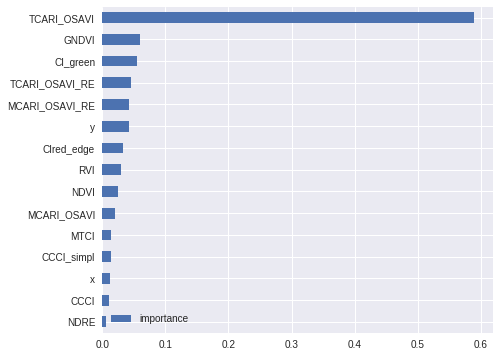

In [17]:
# simple version that shows all of the variables
feature_importances = pd.DataFrame({"importance": model.feature_importances_}, index=X.columns)
feature_importances.sort_values(by=["importance"], inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6))

30 trees
0.9618545300341905

50 trees
0.9664008369447827

100 trees
0.9710788743645716

200 trees
0.9708039091732608

500 trees
0.9704631987370043

1000 trees
0.970855612663143

2000 trees
0.9708193305670738



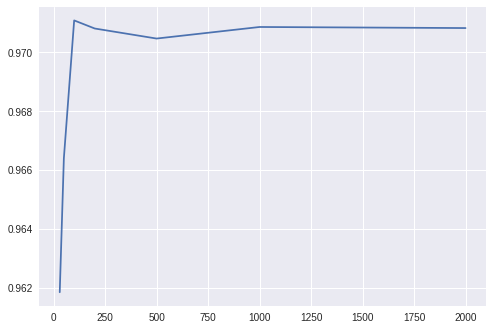

In [18]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=0)
    model.fit(X, y)
    print (trees, "trees")
    # roc = roc_auc_score(y, model.oob_prediction_)
    # print ("C-stat: ", roc)
    print (model.score(X,y))
    results.append(model.score(X,y))
    print ("")
    
pd.Series(results, n_estimator_options).plot();

auto option
0.970855612663143

None option
0.970855612663143

sqrt option
0.9719615958822571

log2 option
0.971961595882257

0.9 option
0.9709518895359888

0.2 option
0.971961595882257



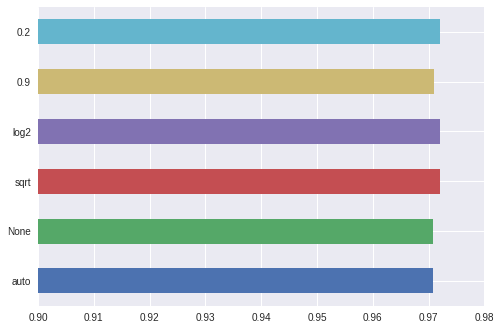

In [19]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=0, max_features=max_features)
    model.fit(X, y)
    print (max_features, "option")
    # roc = roc_auc_score(y, model.oob_prediction_)
    # print ("C-stat: ", roc)
    print (model.score(X,y))
    results.append(model.score(X,y))
    print ("")
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.9,.98));


1 min samples
0.9719615958822571

2 min samples
0.9459990313990796

3 min samples
0.9191428550225023

4 min samples
0.8971538674663126

5 min samples
0.8799057860608271

6 min samples
0.863878407904171

7 min samples
0.8515176234207408

8 min samples
0.8389937826823498

9 min samples
0.8291553661360418

10 min samples
0.8186201679134867



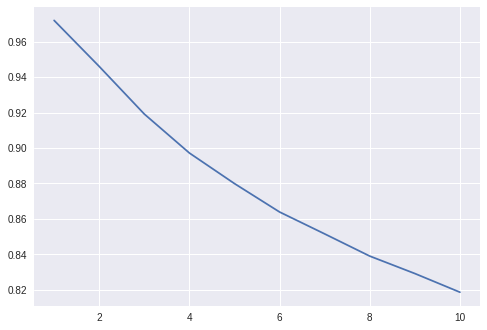

In [21]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=0, 
                                  max_features="sqrt", 
                                  min_samples_leaf=min_samples)
    model.fit(X, y)
    print (min_samples, "min samples")
    # roc = roc_auc_score(y, model.oob_prediction_)
    # print ("C-stat: ", roc)
    print (model.score(X,y))
    results.append(model.score(X,y))
    print ("")
    
pd.Series(results, min_samples_leaf_options).plot();

In [22]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=0, 
                              max_features="sqrt", 
                              min_samples_leaf=1)
model.fit(X, y)

print (model.score(X,y))
# roc = roc_auc_score(y, model.oob_prediction_)
# print ("C-stat: ", roc)

0.9719615958822571


In [46]:
# Make train and test datasets
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print ("R^2:", model.score(X_test, y_test).round(2))

R^2: 0.8


In [48]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print ("R^2:", model.score(X_test, y_test).round(2))

R^2: 0.53


In [49]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
print ("R^2:", model.score(X_test, y_test).round(2))

R^2: 0.73


/home/jorge/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
data = pd.DataFrame({"N_TOTAL": y_test, "Pred": model.predict(X_test)})

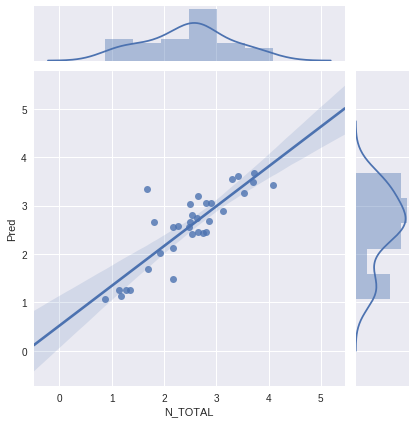

In [29]:
import seaborn as sns
sns.jointplot("N_TOTAL", "Pred", data=data, kind="reg")

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
scores  

array([ -0.15046895,   0.12680503,  -0.69307515,  -2.16258681,
       -10.94108419])

In [31]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -2.76 (+/- 8.33)


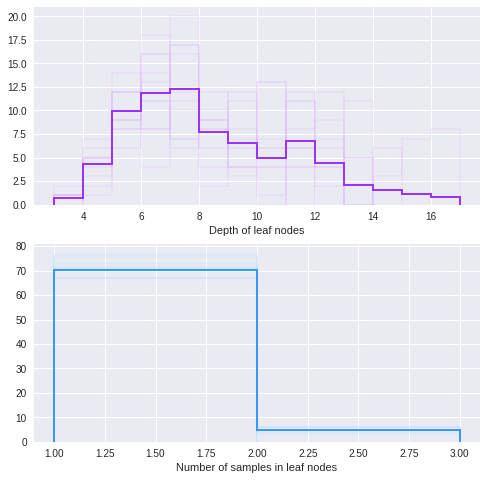

In [32]:
from sklearn.tree import _tree, export_graphviz
import matplotlib.pyplot as plt
def leaf_depths(tree, node_id = 0):
    
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    if left_child == _tree.TREE_LEAF:
        
        depths = np.array([0])

    else:
        
        left_depths = leaf_depths(tree, left_child) + 1
        right_depths = leaf_depths(tree, right_child) + 1

        depths = np.append(left_depths, right_depths)

    return depths

def leaf_samples(tree, node_id = 0):
    
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    if left_child == _tree.TREE_LEAF:
        
        samples = np.array([tree.n_node_samples[node_id]])

    else:
        
        left_samples = leaf_samples(tree, left_child)
        right_samples = leaf_samples(tree, right_child)

        samples = np.append(left_samples, right_samples)

    return samples

def draw_tree(ensemble, tree_id=0):

    plt.figure(figsize=(8,8))
    plt.subplot(211)

    tree = ensemble.estimators_[tree_id].tree_

    depths = leaf_depths(tree)
    plt.hist(depths, histtype='step', color='#9933ff', 
             bins=range(min(depths), max(depths)+1))

    plt.xlabel("Depth of leaf nodes (tree %s)" % tree_id)
    
    plt.subplot(212)
    
    samples = leaf_samples(tree)
    plt.hist(samples, histtype='step', color='#3399ff', 
             bins=range(min(samples), max(samples)+1))
    
    plt.xlabel("Number of samples in leaf nodes (tree %s)" % tree_id)
    
    plt.show()

def draw_ensemble(ensemble):

    plt.figure(figsize=(8,8))
    plt.subplot(211)

    depths_all = np.array([], dtype=int)

    for x in ensemble.estimators_:
        tree = x.tree_
        depths = leaf_depths(tree)
        depths_all = np.append(depths_all, depths)
        plt.hist(depths, histtype='step', color='#ddaaff', 
                 bins=range(min(depths), max(depths)+1))

    plt.hist(depths_all, histtype='step', color='#9933ff', 
             bins=range(min(depths_all), max(depths_all)+1), 
             weights=np.ones(len(depths_all))/len(ensemble.estimators_), 
             linewidth=2)
    plt.xlabel("Depth of leaf nodes")
    
    samples_all = np.array([], dtype=int)
    
    plt.subplot(212)
    
    for x in ensemble.estimators_:
        tree = x.tree_
        samples = leaf_samples(tree)
        samples_all = np.append(samples_all, samples)
        plt.hist(samples, histtype='step', color='#aaddff', 
                 bins=range(min(samples), max(samples)+1))
    
    plt.hist(samples_all, histtype='step', color='#3399ff', 
             bins=range(min(samples_all), max(samples_all)+1), 
             weights=np.ones(len(samples_all))/len(ensemble.estimators_), 
             linewidth=2)
    plt.xlabel("Number of samples in leaf nodes")
    
    plt.show()

draw_ensemble(model)

In [33]:
# model tree
model.estimators_[0]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1608637542, splitter='best')

In [34]:
from sklearn import tree
from sklearn.tree import export_graphviz
import os

export_graphviz(model.estimators_[0],
                feature_names=X.columns,
                filled=True,
                rounded=True)

os.system('dot -Tpng tree.dot -o tree_sin_fosforo_altura_x_y.png')

0

In [35]:
X[numeric_variables].head()

,x,y,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,CCCI_simpl,GNDVI,CCCI,RVI,CIred_edge,TCARI_OSAVI_RE
0,672991,2834763,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,0.155488,0.336669,0.362977,1.520898,0.161725,2.154459
1,673009,2834792,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,0.175170,0.329649,0.382892,1.511626,0.167301,2.188258
2,673016,2834822,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,0.192850,0.353286,0.348945,1.592500,0.172282,2.167296
3,673030,2834850,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,0.317840,0.372851,0.355268,1.736582,0.208449,2.237800
4,673053,2834876,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,0.362056,0.344411,0.435488,1.600575,0.221476,2.164132


In [36]:
y

0      3.26
1      3.31
2      3.78
3      3.48
4      3.49
5      3.46
6      3.75
7      3.72
8      3.75
9      3.86
10     4.04
11     3.71
12     3.82
13     3.75
14     3.26
15     2.75
16     2.44
17     2.51
18     2.61
19     2.76
20     2.64
21     3.02
22     2.80
23     3.07
24     2.69
25     3.51
26     2.53
27     1.94
28     2.74
29     2.17
       ... 
132    1.63
133    1.13
134    1.24
135    1.29
136    1.29
137    1.83
138    1.88
139    1.59
140    1.67
141    1.88
142    1.96
143    1.30
144    1.10
145    1.18
146    1.21
147    1.21
148    1.26
149    1.24
150    1.24
151    1.34
152    1.26
153    1.18
154    1.18
155    1.18
156    0.81
157    1.27
158    1.09
159    0.91
160    0.82
161    0.88
Name: N_TOTAL, Length: 162, dtype: float64

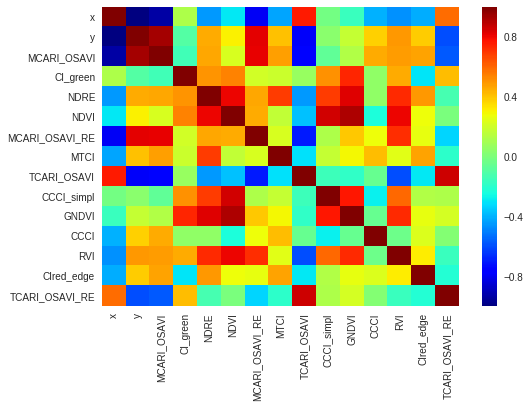

In [37]:
sns.heatmap(X[numeric_variables].corr(), cmap="jet")

In [38]:
import statsmodels.api as sm
est = sm.OLS(y, X[numeric_variables]).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                N_TOTAL   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     526.8
Date:                Sun, 17 Feb 2019   Prob (F-statistic):          1.49e-119
Time:                        21:18:56   Log-Likelihood:                -62.155
No. Observations:                 162   AIC:                             154.3
Df Residuals:                     147   BIC:                             200.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
x               3.024e-06   3.01e-05      0.

# linear regression

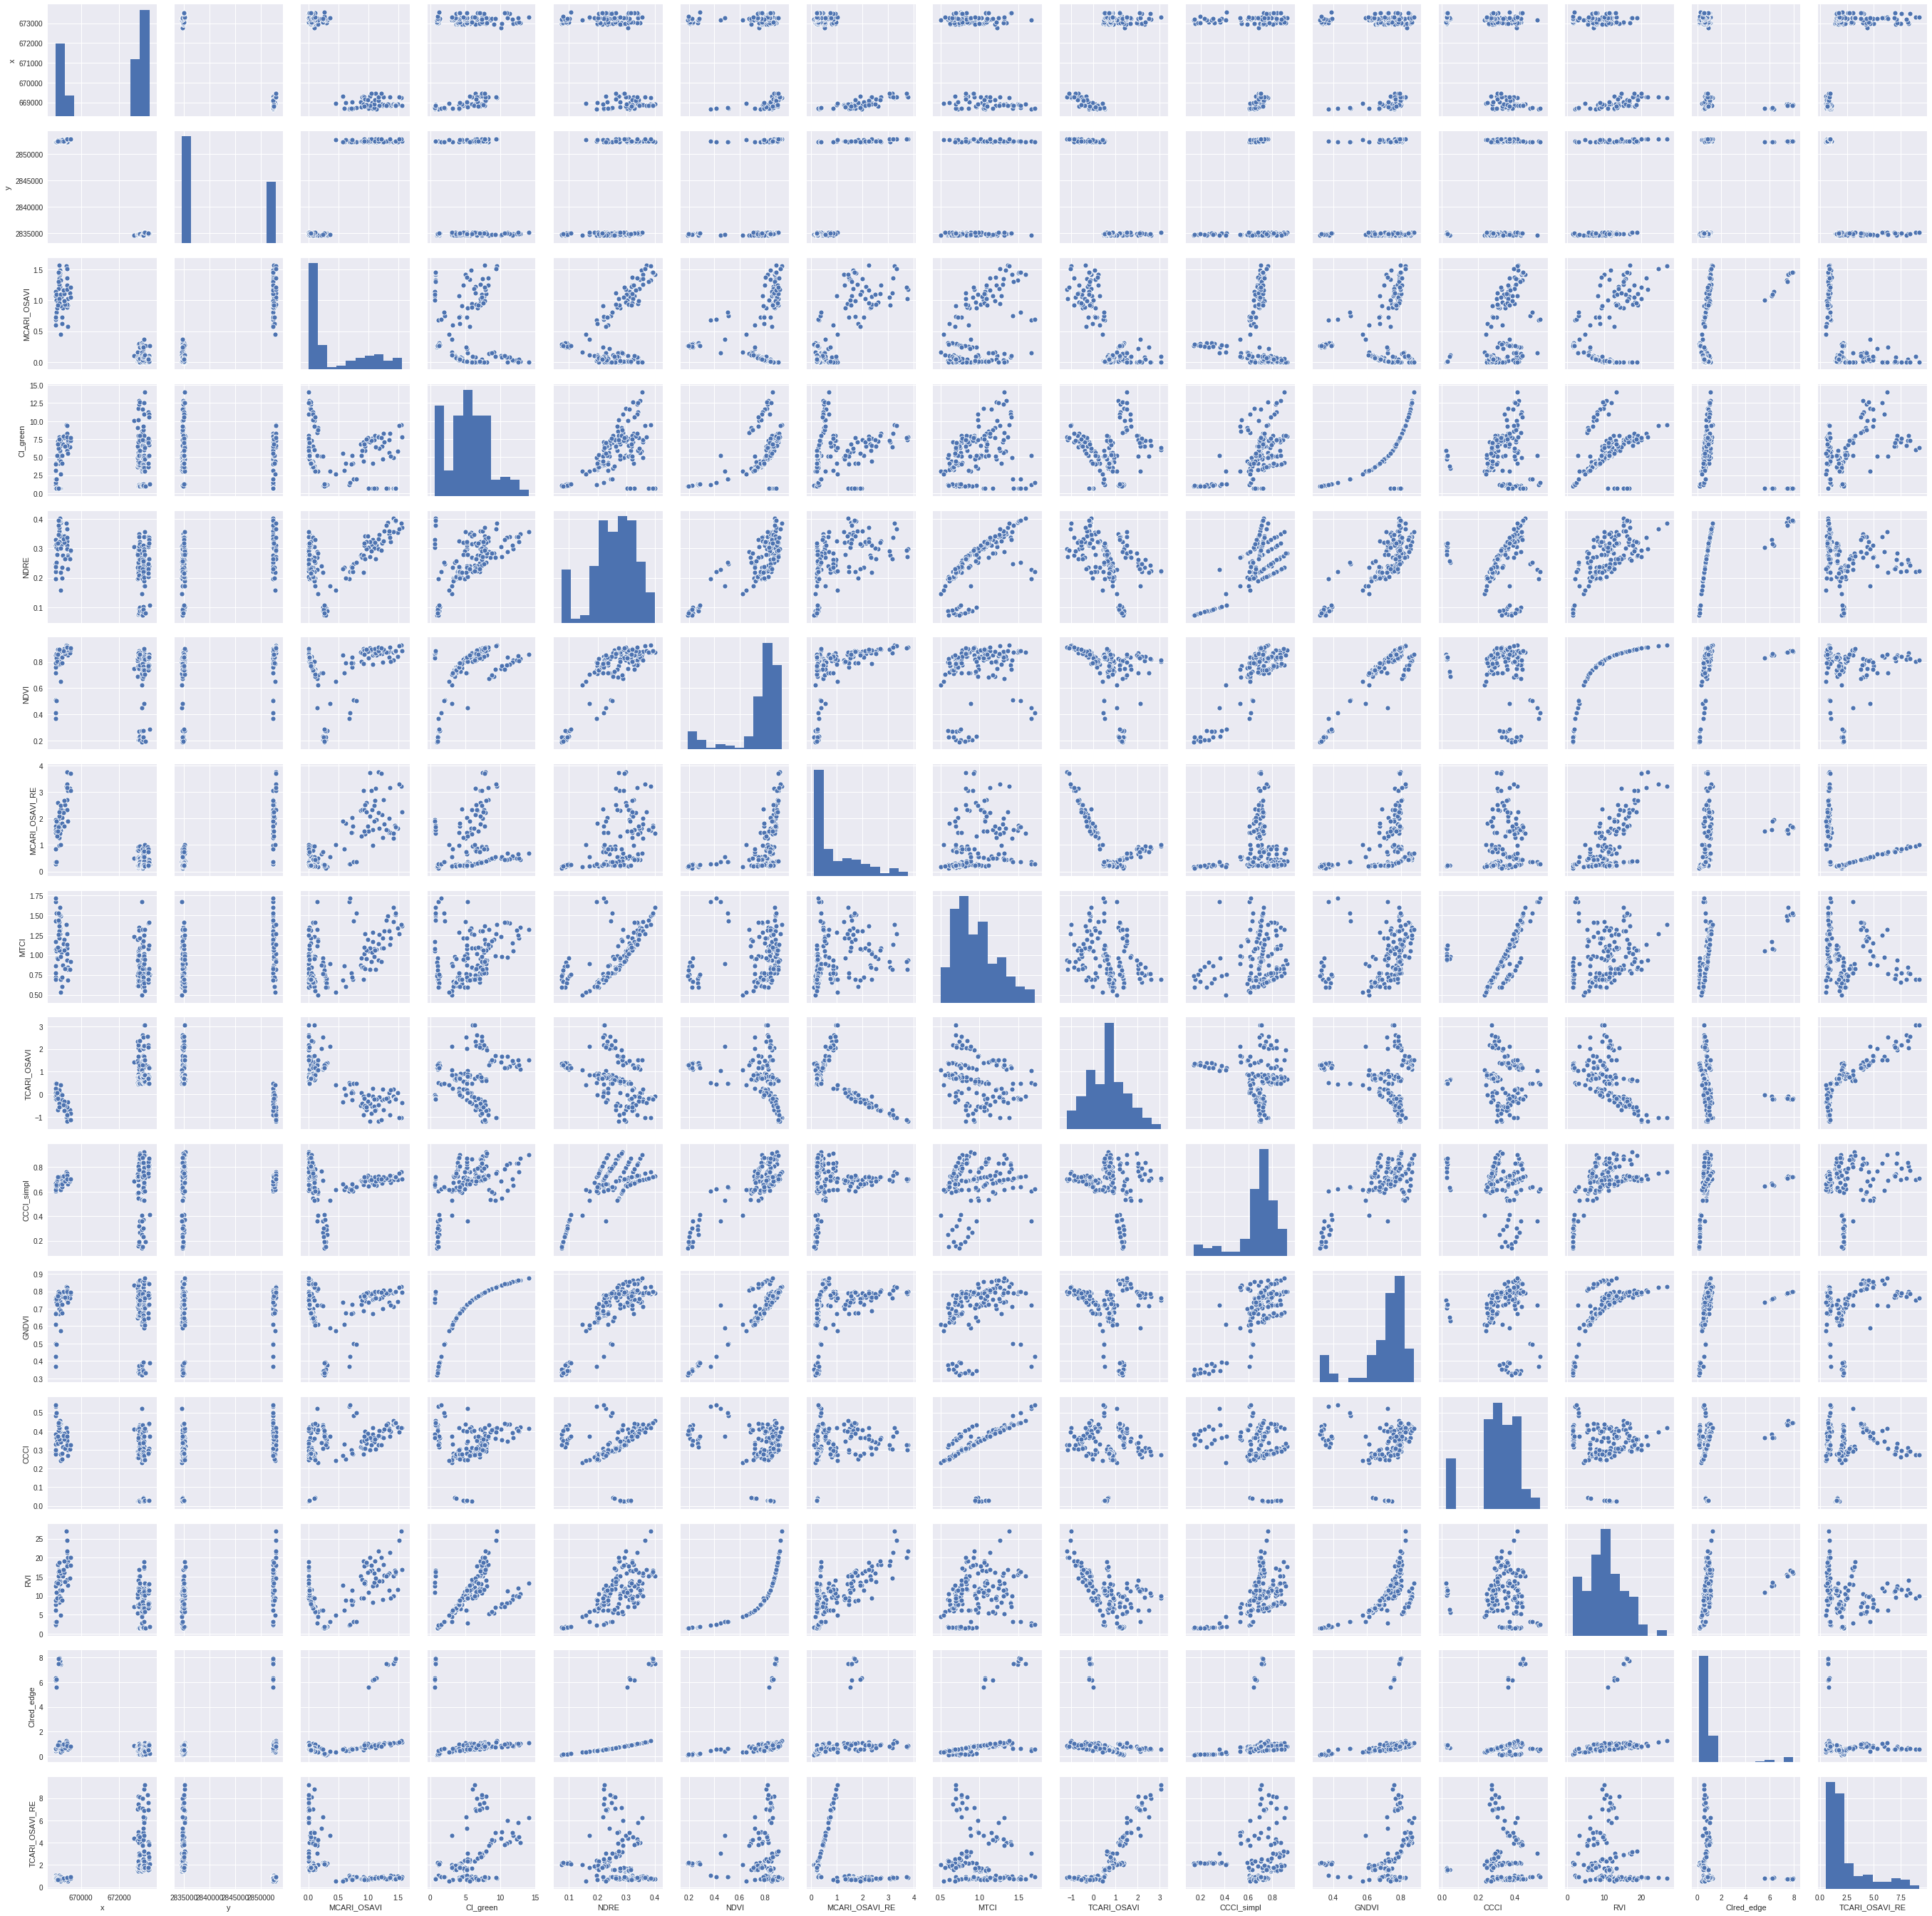

In [39]:
sns.pairplot(X[numeric_variables])

Coefficients: 
 [-4.32936682e-04 -1.07509829e-04  1.59995841e+00 -5.95056204e-02
  5.06877476e+00 -6.36406219e+00 -1.03374458e+00 -9.90115159e-01
 -1.09397897e+00  1.55330692e+00  2.84108264e+00 -2.40275338e+00
 -1.97028146e-02 -1.69481079e-01  5.47983824e-01]


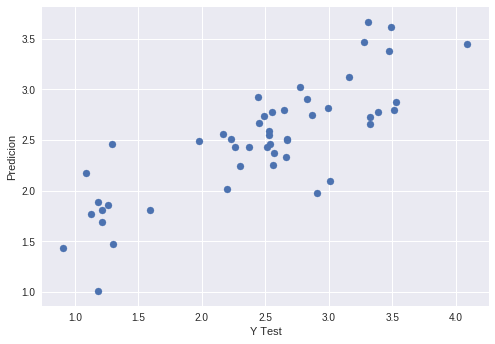

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[numeric_variables], y, test_size=0.3, random_state=101)

from sklearn.linear_model import LinearRegression

# crear la estancia del modelo
model = LinearRegression()

# ajustar el modelo a la información de entrenamiento
model.fit(X_train,y_train)

# coeficientes del modelo
print('Coefficients: \n', model.coef_)

predictions = model.predict( X_test)

# crear una gráfica con los valores sinteticos vs reales
plt.scatter(y_test,predictions)
plt.xlabel('Y Test',)
plt.ylabel('Predicion')
plt.show()

In [41]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,predictions)

print(r_value**2)

0.6659279694823333


/home/jorge/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


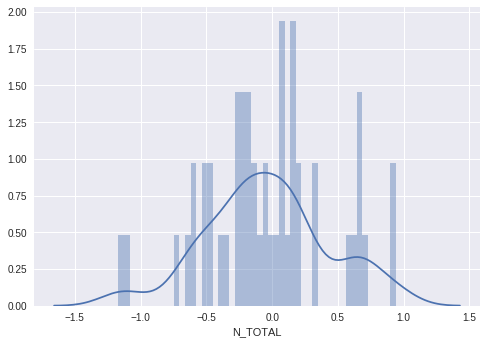

In [42]:
sns.distplot((y_test-predictions),bins=50);

In [43]:
coeffecients = pd.DataFrame(model.coef_,X[numeric_variables].columns)
coeffecients.columns = ['Coeficiente']
print(coeffecients)

                Coeficiente
x                 -0.000433
y                 -0.000108
MCARI_OSAVI        1.599958
CI_green          -0.059506
NDRE               5.068775
NDVI              -6.364062
MCARI_OSAVI_RE    -1.033745
MTCI              -0.990115
TCARI_OSAVI       -1.093979
CCCI_simpl         1.553307
GNDVI              2.841083
CCCI              -2.402753
RVI               -0.019703
CIred_edge        -0.169481
TCARI_OSAVI_RE     0.547984


In [44]:
#import the data
df = pd.read_csv("data/muestreo_con_indices.csv")

df.drop("x", axis=1, inplace=True)
df.drop("y", axis=1, inplace=True)

In [45]:
df.columns

Index(['FECHA', 'MCARI_OSAVI', 'CI_green', 'NDRE', 'NDVI', 'MCARI_OSAVI_RE',
       'MTCI', 'TCARI_OSAVI', 'CCCI_simpl', 'GNDVI', 'CCCI', 'N_TOTAL', 'RVI',
       'CIred_edge', 'TCARI_OSAVI_RE'],
      dtype='object')

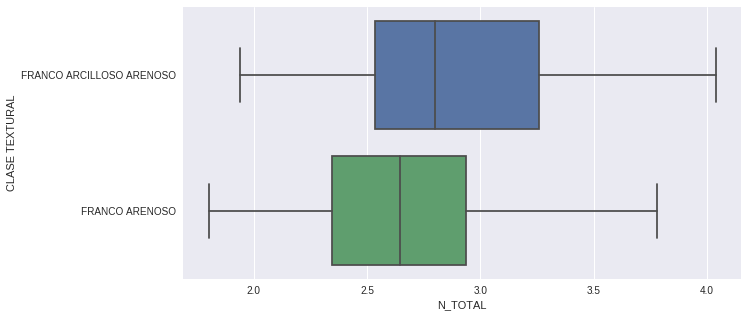

In [84]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x="N_TOTAL",y="CLASE TEXTURAL",data=df)

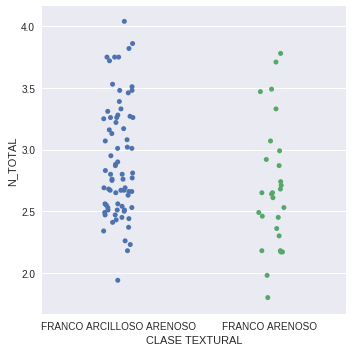

In [86]:
g = sns.catplot(x="CLASE TEXTURAL", y="N_TOTAL", data=df)